# Masking

## Importing necessary libraries

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Read the Image and display it

In [2]:
image_color=mpimg.imread("road.jpg")

In [3]:
image_color.shape

(480, 699, 3)

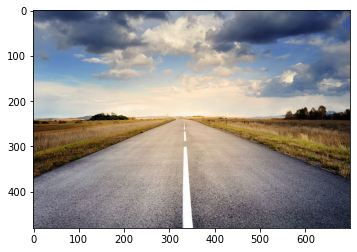

In [4]:
plt.imshow(image_color)

(480, 699)

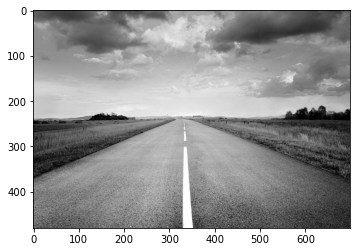

In [5]:
image_gray=cv2.cvtColor(image_color,cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray,cmap='gray')
image_gray.shape

## Lets sort out the white color out of the image

In [6]:
image_copy=np.copy(image_gray)
image_copy.shape

(480, 699)

In [7]:
image_copy[(image_copy[:,:]<250)]=0 #any value that is not white

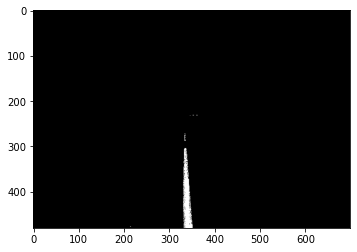

In [8]:
plt.imshow(image_copy,cmap='gray')
plt.show()

In [9]:
image_color=mpimg.imread("road.jpg")

In [10]:
image_copy=np.copy(image_color)
image_copy.shape

(480, 699, 3)

In [11]:
image_copy[(image_copy[:,:,0]<200)|(image_copy[:,:,1]<200)|(image_copy[:,:,2]<200)]=0

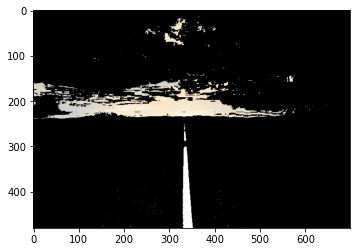

In [12]:
plt.imshow(image_copy,cmap='gray')
plt.show()

## Region Of Interest(ROI) Selection

In [13]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [14]:
image_color=cv2.imread("road.jpg")

In [15]:
cv2.imshow('Original Image',image_color)
cv2.waitKey()
cv2.destroyAllWindows()

In [16]:
height,width,channels=image_color.shape
channels

3

In [17]:
height,width=image_color.shape[:2]

In [18]:
height

480

In [19]:
width

699

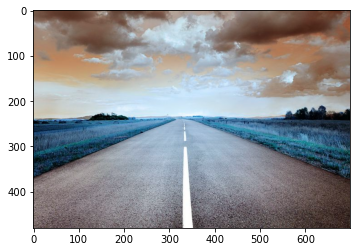

In [20]:
plt.imshow(image_color)

In [21]:
image_color.shape

(480, 699, 3)

## Convert to grayscale

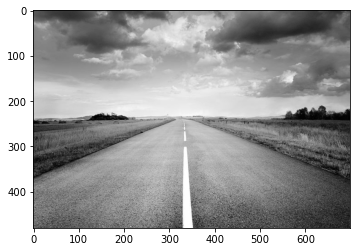

In [29]:
image_gray=cv2.cvtColor(image_color,cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray,cmap='gray')

## Perform Region of interest masking

In [22]:
# Select points of the region of interest (ROI)
ROI = np.array([[(0, height),(400, 330), (550, 330), (width, height)]], dtype=np.int32)    
 
# define a blank image with all zeros (ie: black) 
blank = np.zeros_like(image_gray)  

In [23]:
blank

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [24]:
blank.shape

(480, 699)

In [25]:

# Fill the Region of interest with white color (ie: 255)!

mask = cv2.fillPoly(blank, ROI, 255)

# Perform bitwise AND operation to select only the region of interest

masked_image = cv2.bitwise_and(image_gray, mask)

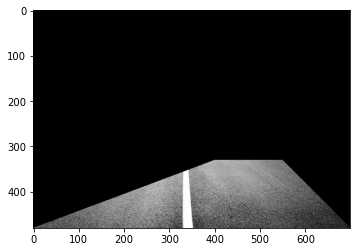

In [31]:
plt.imshow(masked_image, cmap = 'gray');